# ALCHEMY OF REAL ESTATE VALUE

## 1. Business Understanding:

For zillow , the project centers on addressing the practical challenge of identifying optimal real estate investment opportunities in a dynamic market. The core objective is to empower decision-makers with data-driven insights, enabling them to make informed investment choices. By prioritizing profit optimization, risk mitigation, and ROI enhancement, the project directly serves the needs of the investment firm. The outcomes of this analysis have broader implications for professionals and participants in the real estate market, contributing valuable insights to guide their actions. This approach ensures that the project provides relevant, actionable, and meaningful results, aligning with the checklist's criteria for business understanding.

### a) Introduction:

Zillow, the top U.S. real estate website, provides end-to-end services—buying, selling, renting, financing—with transparency and ease. Our affiliated lender, Zillow Home Loans, boosts our ability to offer insights to the investment firm.

### b) Problem Statement
This project seeks to identify high-potential real estate investments for a fictional investment firm. The task involves optimizing profit while managing risk, ensuring a favorable ROI. Decision-makers in a dynamic real estate market require data-driven insights for informed investments. The project's objective is to empower executives, maximizing returns for the firm and benefiting the broader real estate market.

### c) Data Relevance
Each row in the dataset corresponds to a unique zip code and contains comprehensive location details along with the median housing sales prices for each month.

The dataset consists of a total of 14,723 rows and encompasses 272 different variables:

* RegionID: A unique identifier ranging from 58196 to 753844.
* RegionName: A unique Zip Code, varying between 1001 and 99901.
* City: The city in which the respective zip code is situated.
* State: The state where the zip code is located.
* Metro: The metropolitan area encompassing the zip code.
* CountyName: The county within which the zip code falls.
* SizeRank: A numerical ranking reflecting the size of the zip code, ranked from 1 to 14723.
* 1996-04 through 2018-04: These columns represent the median housing sales values for each month, from April 1996 through April 2018, amounting to 265 data points of monthly data for each zip code.

### 3. Data Understanding

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Importing the data from the csv 
df = pd.read_csv('zillow_data.csv')

# Examining the first five rows of our dataframe
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.shape

(14723, 272)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# list columns that are of the ‘object’ type
df.select_dtypes(include=['object']).columns.tolist()

['City', 'State', 'Metro', 'CountyName']

### Observation
* Data appears to be sorted by SizeRank, largest to smallest
* Most column names will be changed to datetime
* The dataset has missing values

In [62]:
# Print the frequency of each unique RegionName in the dataframe
print(df.RegionName.value_counts())

# Print the number of unique RegionNames in the dataframe
print(df.RegionName.nunique())

# Print the smallest RegionName in the dataframe
print(df.RegionName.min())

# Print the largest RegionName in the dataframe
print(df.RegionName.max())

60657    1
7764     1
1226     1
13624    1
45335    1
        ..
22556    1
33761    1
38242    1
33602    1
89155    1
Name: RegionName, Length: 14723, dtype: int64
14723
1001
99901


In [63]:
# Identify the column with the least amount of data
for col in reversed(df.columns):
    if df[col].isna().sum() > 0:
        print(col)
        break

2014-06


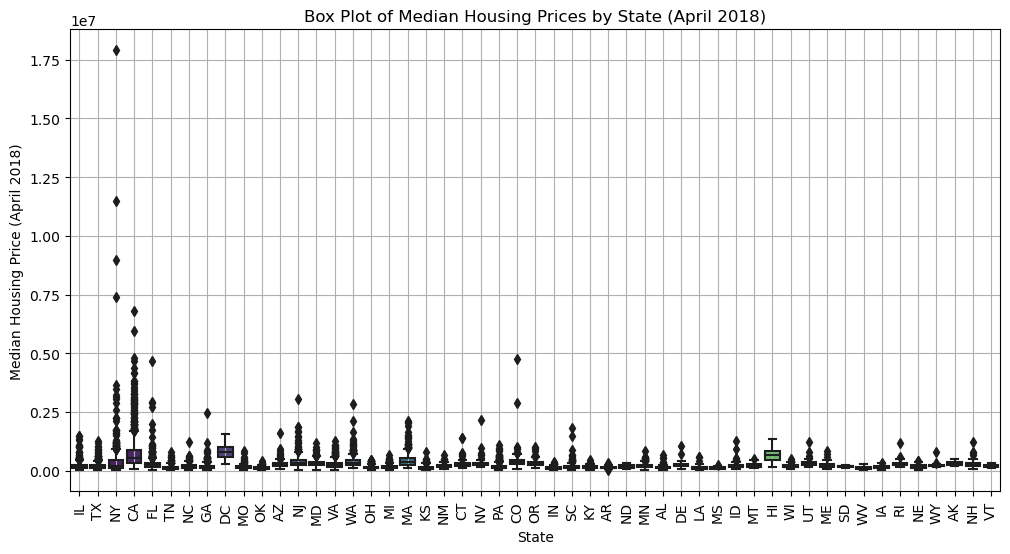

In [64]:
# A box plot of the median housing prices by state in April 2018
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='2018-04', palette='viridis')
plt.xlabel('State')
plt.ylabel('Median Housing Price (April 2018)')
plt.title('Box Plot of Median Housing Prices by State (April 2018)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Observation
* From the boxplot, we see outliers mostly in NY state and CA state since they extreme values 

In [65]:
print(df.describe())

            RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.66509

### 4. Data Preparation

In [7]:
# Check for missing and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64
0


In [8]:
# list columns with null values
df.columns[df.isna().any()].tolist()

['Metro',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003

In [9]:
# Drop null values for the ‘Metro’ column
df = df.dropna(subset=['Metro'])

### 5. Exploratory Data Analysis

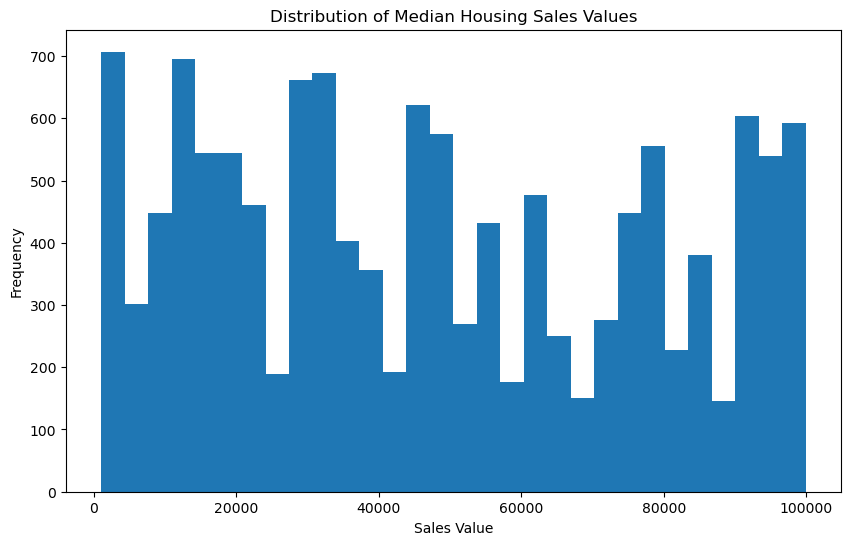

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['RegionName'], bins=30)
plt.title('Distribution of Median Housing Sales Values')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.show()

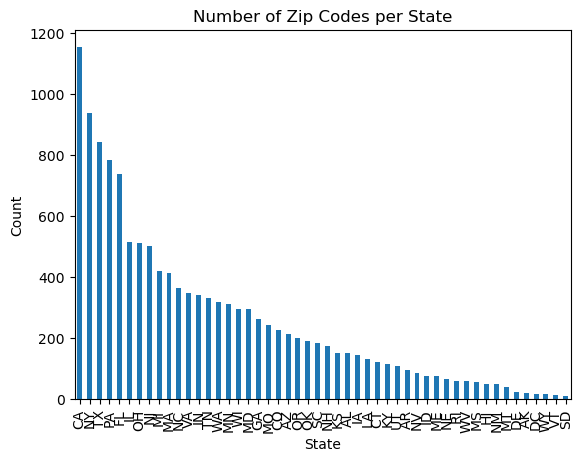

In [69]:
# Bar plot for the state column
df['State'].value_counts().plot(kind='bar')
plt.title('Number of Zip Codes per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [71]:
# Calculate 4-year ROI for each zip code
df['4_yr_ROI'] = (df['2018-04'] - df['2014-07']) / df['2014-07']

# Identify top 5 zip codes with highest ROI
top_5_zipcodes = df.nlargest(5, '4_yr_ROI')

# Print the top 5 zip codes
print(top_5_zipcodes['RegionName'])

6563    15201
4554    33805
6105    37210
3229    32117
2347    32205
Name: RegionName, dtype: int64


### 6. Modellling

#### Time series analysis

In [52]:
# Reshape from wide format to long format
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [53]:
melted_df = melt_data(df)
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [34]:
# # Select the relevant date columns
# date_columns = df.columns[8:-1]

# # Melt the date columns into a single column 'Date' and 'Value'
# melted_data = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
#                       value_vars=date_columns, var_name='Date', value_name='Value')

# # Convert the 'Date' column to datetime format
# melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%Y-%m')

# # Sort the dataframe by 'RegionName' and 'Date'
# melted_data.sort_values(by=['RegionName', 'Date'], inplace=True)


In [37]:
# melted_data.head()

       RegionName    City State        Metro CountyName  SizeRank       Date  \
5850         1001  Agawam    MA  Springfield    Hampden      5851 1996-05-01   
20573        1001  Agawam    MA  Springfield    Hampden      5851 1996-06-01   
35296        1001  Agawam    MA  Springfield    Hampden      5851 1996-07-01   
50019        1001  Agawam    MA  Springfield    Hampden      5851 1996-08-01   
64742        1001  Agawam    MA  Springfield    Hampden      5851 1996-09-01   

          Value  
5850   112800.0  
20573  112600.0  
35296  112300.0  
50019  112100.0  
64742  111900.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3872149 entries, 5850 to 3864719
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionName  int64         
 1   City        object        
 2   State       object        
 3   Metro       object        
 4   CountyName  object        
 5   SizeRank    int64         
 6   Date        datetime64[ns]
 7   Val

,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
5850,1001,Agawam,MA,Springfield,Hampden,5851,1996-05-01,112800.0
20573,1001,Agawam,MA,Springfield,Hampden,5851,1996-06-01,112600.0
35296,1001,Agawam,MA,Springfield,Hampden,5851,1996-07-01,112300.0
50019,1001,Agawam,MA,Springfield,Hampden,5851,1996-08-01,112100.0
64742,1001,Agawam,MA,Springfield,Hampden,5851,1996-09-01,111900.0


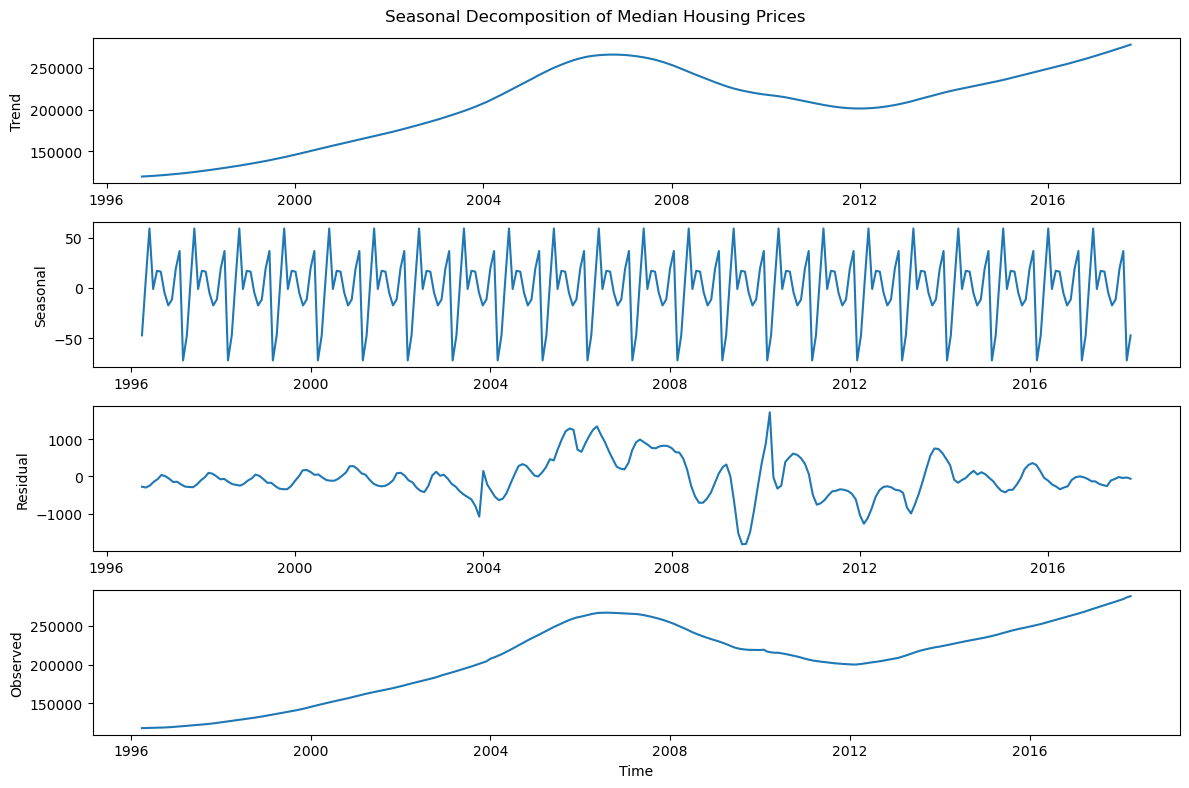

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 4. Seasonal Decomposition
result = seasonal_decompose(melted_df['value'], model='additive', period=12)  # You may need to adjust the period
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(result.trend)
ax1.set_ylabel('Trend')
ax2.plot(result.seasonal)
ax2.set_ylabel('Seasonal')
ax3.plot(result.resid)
ax3.set_ylabel('Residual')
ax4.plot(result.observed)
ax4.set_ylabel('Observed')
plt.xlabel('Time')
plt.suptitle('Seasonal Decomposition of Median Housing Prices')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

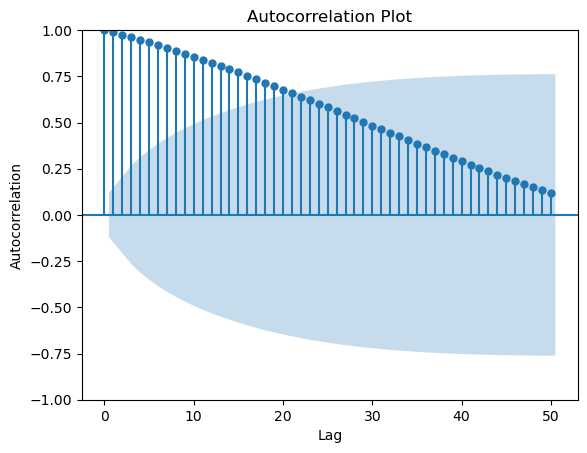

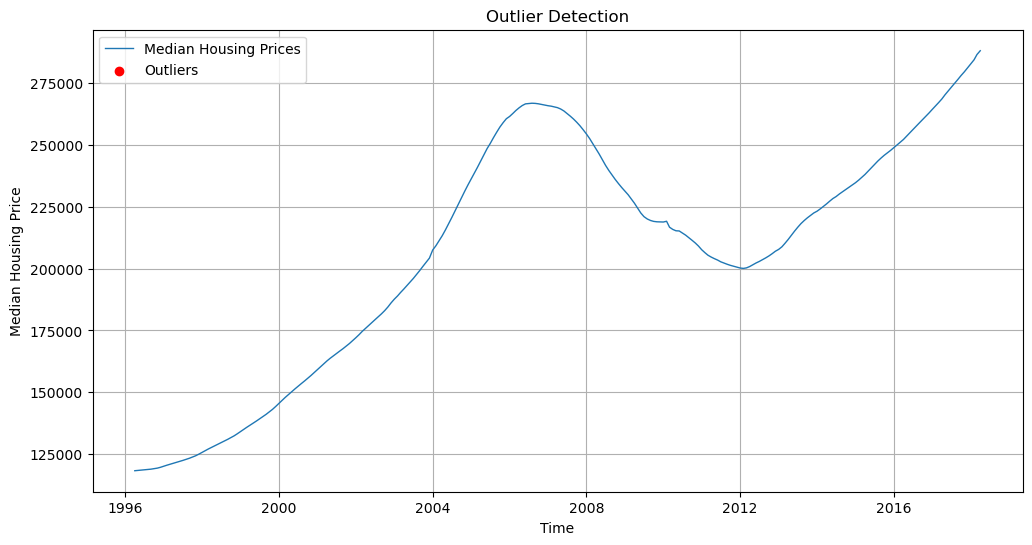

In [60]:
# 7. Lag Analysis (Example: Autocorrelation Plot)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(melted_df['value'], lags=50)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# 8. Outlier Detection (Example: Z-Score)
from scipy import stats
z_scores = np.abs(stats.zscore(melted_df['value']))
outliers = (z_scores > 3)
outlier_indices = melted_df.index[outliers]

# 9. Visualization of Outliers (Optional)
plt.figure(figsize=(12, 6))
plt.plot(melted_df.index, melted_df['value'], label='Median Housing Prices', linewidth=1)
plt.scatter(outlier_indices, melted_df.loc[outlier_indices, 'value'], c='red', label='Outliers')
plt.title('Outlier Detection')
plt.xlabel('Time')
plt.ylabel('Median Housing Price')
plt.legend()
plt.grid(True)
plt.show()

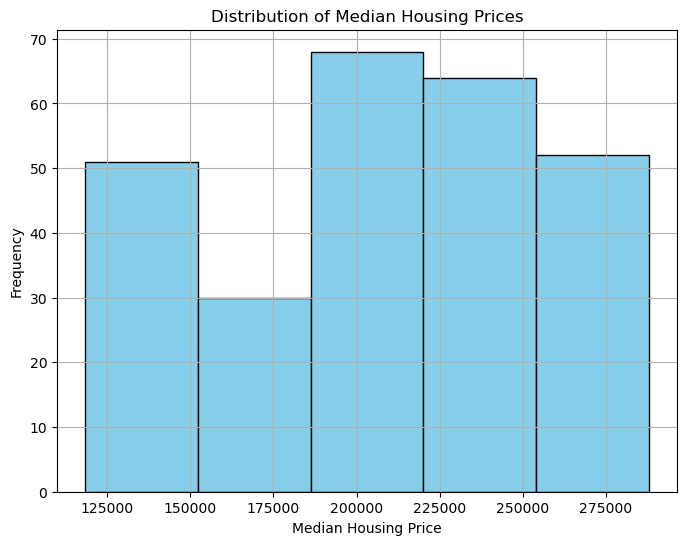

In [55]:
# Plot a histogram of median housing prices ('value' column)
plt.figure(figsize=(8, 6))
plt.hist(melted_df['value'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Median Housing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Median Housing Prices')
plt.grid(True)
plt.show()

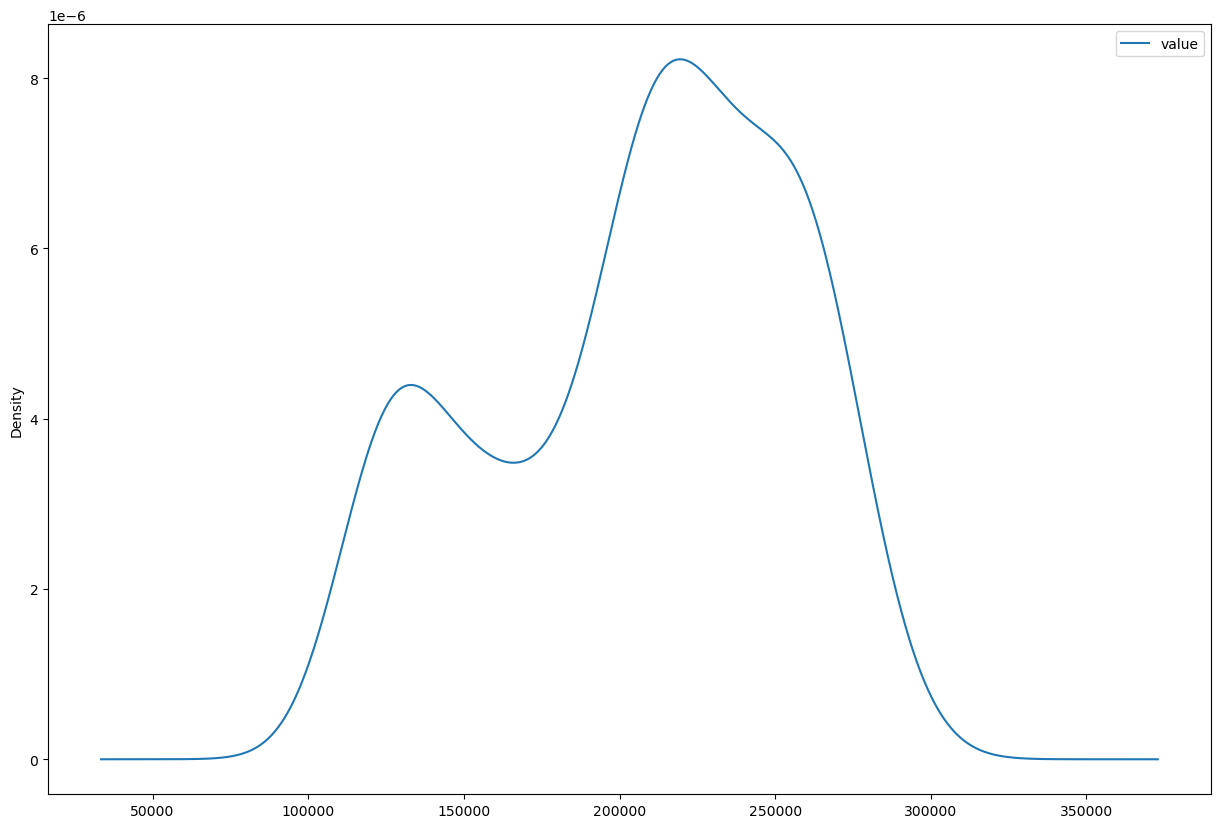

In [56]:
melted_df.plot(kind='kde', figsize = (15,10));

#### Creating the baseline model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Baseline ARIMA model
train_size = int(len(melted_df) * 0.8)
train, test = data['2018-04'][:train_size], data['2018-04'][train_size:]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))
rmse = sqrt(mean_squared_error(test, predictions))
print("Baseline ARIMA Model RMSE:", rmse)

#### Model Evaluation

In [77]:
# This dataframe will show us how accurate our models are 
eval_df = evaluate_models(train, test)

# Displaying the dataframe
eval_df

NameError: name 'train' is not defined

In [ ]:
# Calculating the average error using the dataframe above 
average_error = str(round(sum([int(i) for i in eval_df['% Error']]) / len(eval_df) , 2)) + '%'

# Printing the result
print(f"On average our model based predictions were {average_error} off from the observed values.")

In [ ]:
# Getting predictions from our models for September of 2021
model_predictions_2021 = generate_predictions(train, 24)

# Checking out the results
model_predictions_2021

### 7. Conclusion

### 8. Recommedation

* Obtain current data after 2018 for current predictions.
* Investigate why some of the models seem so far off in their forecasts.
